In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join
import warnings

from src import DEFAULT_DIR
from src.XPLAIN_explainer import XPLAIN_explainer
from src.XPLAIN_explanation import XPLAIN_explanation

/home/andrea/Documents/Politecnico/tirocinio/src/../


/home/andrea/venv-environments/lace/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
def get_explanation(dataset_name: str, classifier_name: str, instance_id: int) -> XPLAIN_explanation:
    explainer = XPLAIN_explainer(dataset_name, classifier_name, random_explain_dataset=True)
    instance = explainer.explain_dataset.get_decoded(instance_id)
    cc = explainer.explain_dataset.class_column_name()
    target_class = instance[cc]
    return explainer.explain_instance(instance, target_class=target_class)

def get_data(clf_name: str):  
    nn0 = get_explanation(join(DEFAULT_DIR, "datasets/monks.arff"), clf_name, 0) # 137
    nn1 = get_explanation(join(DEFAULT_DIR, "datasets/monks.arff"), clf_name, 1) # 64
    nn3 = get_explanation(join(DEFAULT_DIR, "datasets/monks.arff"), clf_name, 3) # 120
    return nn0, nn1, nn3

# Monks

The target concept associated with the 1st Monk's problem is the binary outcome of the logical formula:

```MONK-1: (a == b) or (e == 1)```


## Attribute information:
* `a: 1, 2, 3`
* `b: 1, 2, 3`
* `c: 1, 2`
* `d: 1, 2, 3`
* `e: 1, 2, 3, 4`
* `f: 1, 2`


# Neural Network

In [4]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    oh0,oh1,oh3 = get_data("nn_onehot_enc")
    le0,le1,le3 = get_data("nn_label_enc")
    co0,co1,co3 = get_data("nn_continuizer")

compute_lace_step k=21
compute_lace_step k=42
compute_lace_step k=63
compute_lace_step k=84
compute_lace_step k=105
compute_lace_step k=126
compute_lace_step k=147
compute_lace_step k=168
compute_lace_step k=189
compute_lace_step k=210
explain_instance errors: [0.15772864880572646, 0.15772864880572646, 0.15772864880572646, 0.15772864880572646, 0.15772864880572646, 0.15772864880572646, 0.15772864880572646, 0.15772864880572646, 0.15772864880572646, 0.15772864880572646]
compute_lace_step k=21
compute_lace_step k=42
compute_lace_step k=63
compute_lace_step k=84
compute_lace_step k=105
compute_lace_step k=126
compute_lace_step k=147
compute_lace_step k=168
compute_lace_step k=189
compute_lace_step k=210
explain_instance errors: [0.15772864880572646, 0.15772864880572646, 0.15772864880572646, 0.15772864880572646, 0.15772864880572646, 0.15772864880572646, 0.15772864880572646, 0.15772864880572646, 0.15772864880572646, 0.15772864880572646]
compute_lace_step k=21
explain_instance errors: [0.00083

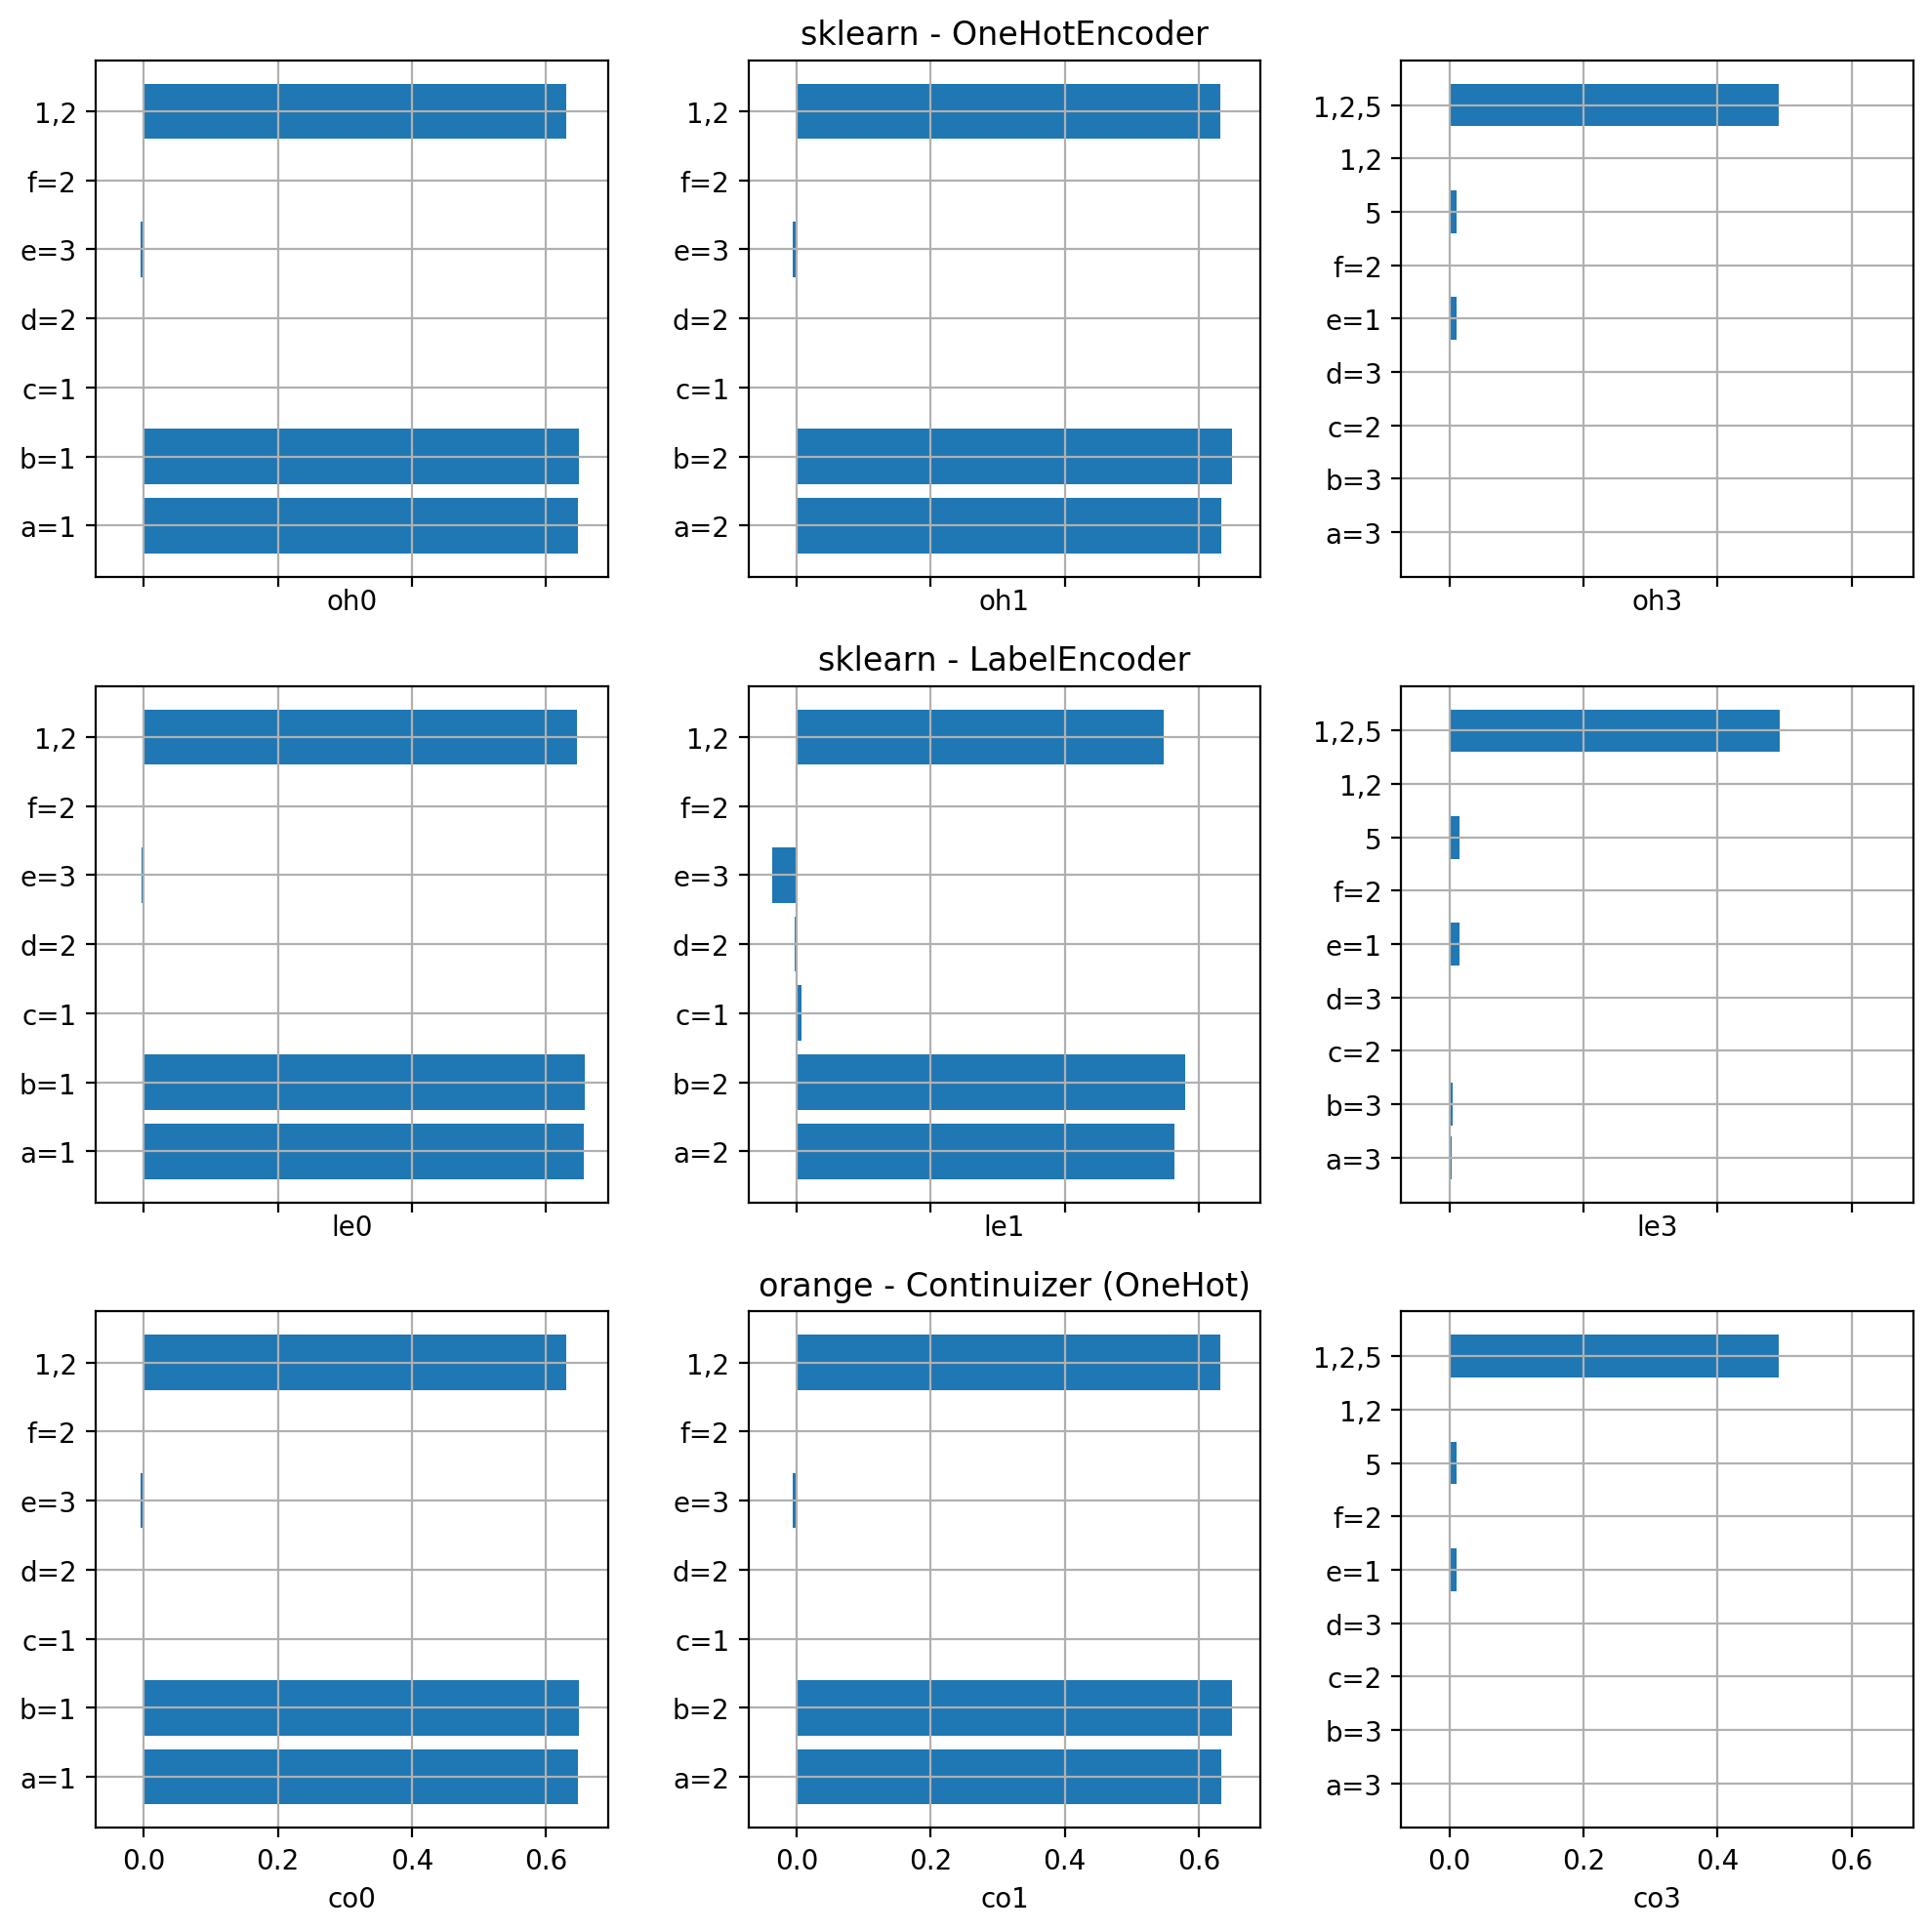

In [5]:
def plot():
    import matplotlib.pyplot as plt
    
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.rcParams['figure.dpi'] = 200
    
    fig, axes = plt.subplots(3,3, sharex=True, sharey=False)
    
    for ax,e in zip(list(axes.ravel()), [oh0,oh1,oh3,le0,le1,le3,co0,co1,co3]):
        ax.barh(
            [f"{v.variable.name}={v}" for v in list(e.instance.values())[:-1]] + list(e.map_difference.keys()),
            e.diff_single + list(e.map_difference.values()))
        ax.grid(True)

    for ax,t in zip(
        list(axes.ravel()),
        ['oh0','oh1','oh3','le0','le1','le3','co0','co1','co3']):
        ax.set_xlabel(f"{t}")
    
    axes[0,1].set_title("sklearn - OneHotEncoder")
    axes[1,1].set_title("sklearn - LabelEncoder")
    axes[2,1].set_title("orange - Continuizer (OneHot)")
    
    fig.tight_layout()
    
plot()

# Naive Bayes

In [6]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    onb0,onb1,onb3 = get_data("nb")
    snb0,snb1,snb3 = get_data("sklearn_nb")

compute_lace_step k=21
compute_lace_step k=42
explain_instance errors: [0.16048117811984752, 0.1921993641341072]
compute_lace_step k=21
compute_lace_step k=42
compute_lace_step k=63
compute_lace_step k=84
compute_lace_step k=105
compute_lace_step k=126
compute_lace_step k=147
compute_lace_step k=168
explain_instance errors: [0.20308279344486463, 0.17525704149750898, 0.17525704149750898, 0.17525704149750898, 0.17525704149750898, 0.17525704149750898, 0.17348671787638764, 0.003971703036130481]
compute_lace_step k=21
explain_instance errors: [0.008542859966721661]
compute_lace_step k=21
compute_lace_step k=42
compute_lace_step k=63
compute_lace_step k=84
explain_instance errors: [0.048516900873828706, 0.048516900873828706, 0.03844158315403945, 0.0017123656960313927]
compute_lace_step k=21
explain_instance errors: [0.008259653056763905]
compute_lace_step k=21
compute_lace_step k=42
compute_lace_step k=63
explain_instance errors: [0.23187419538488452, 0.17259297169460597, 0.00400115104962239

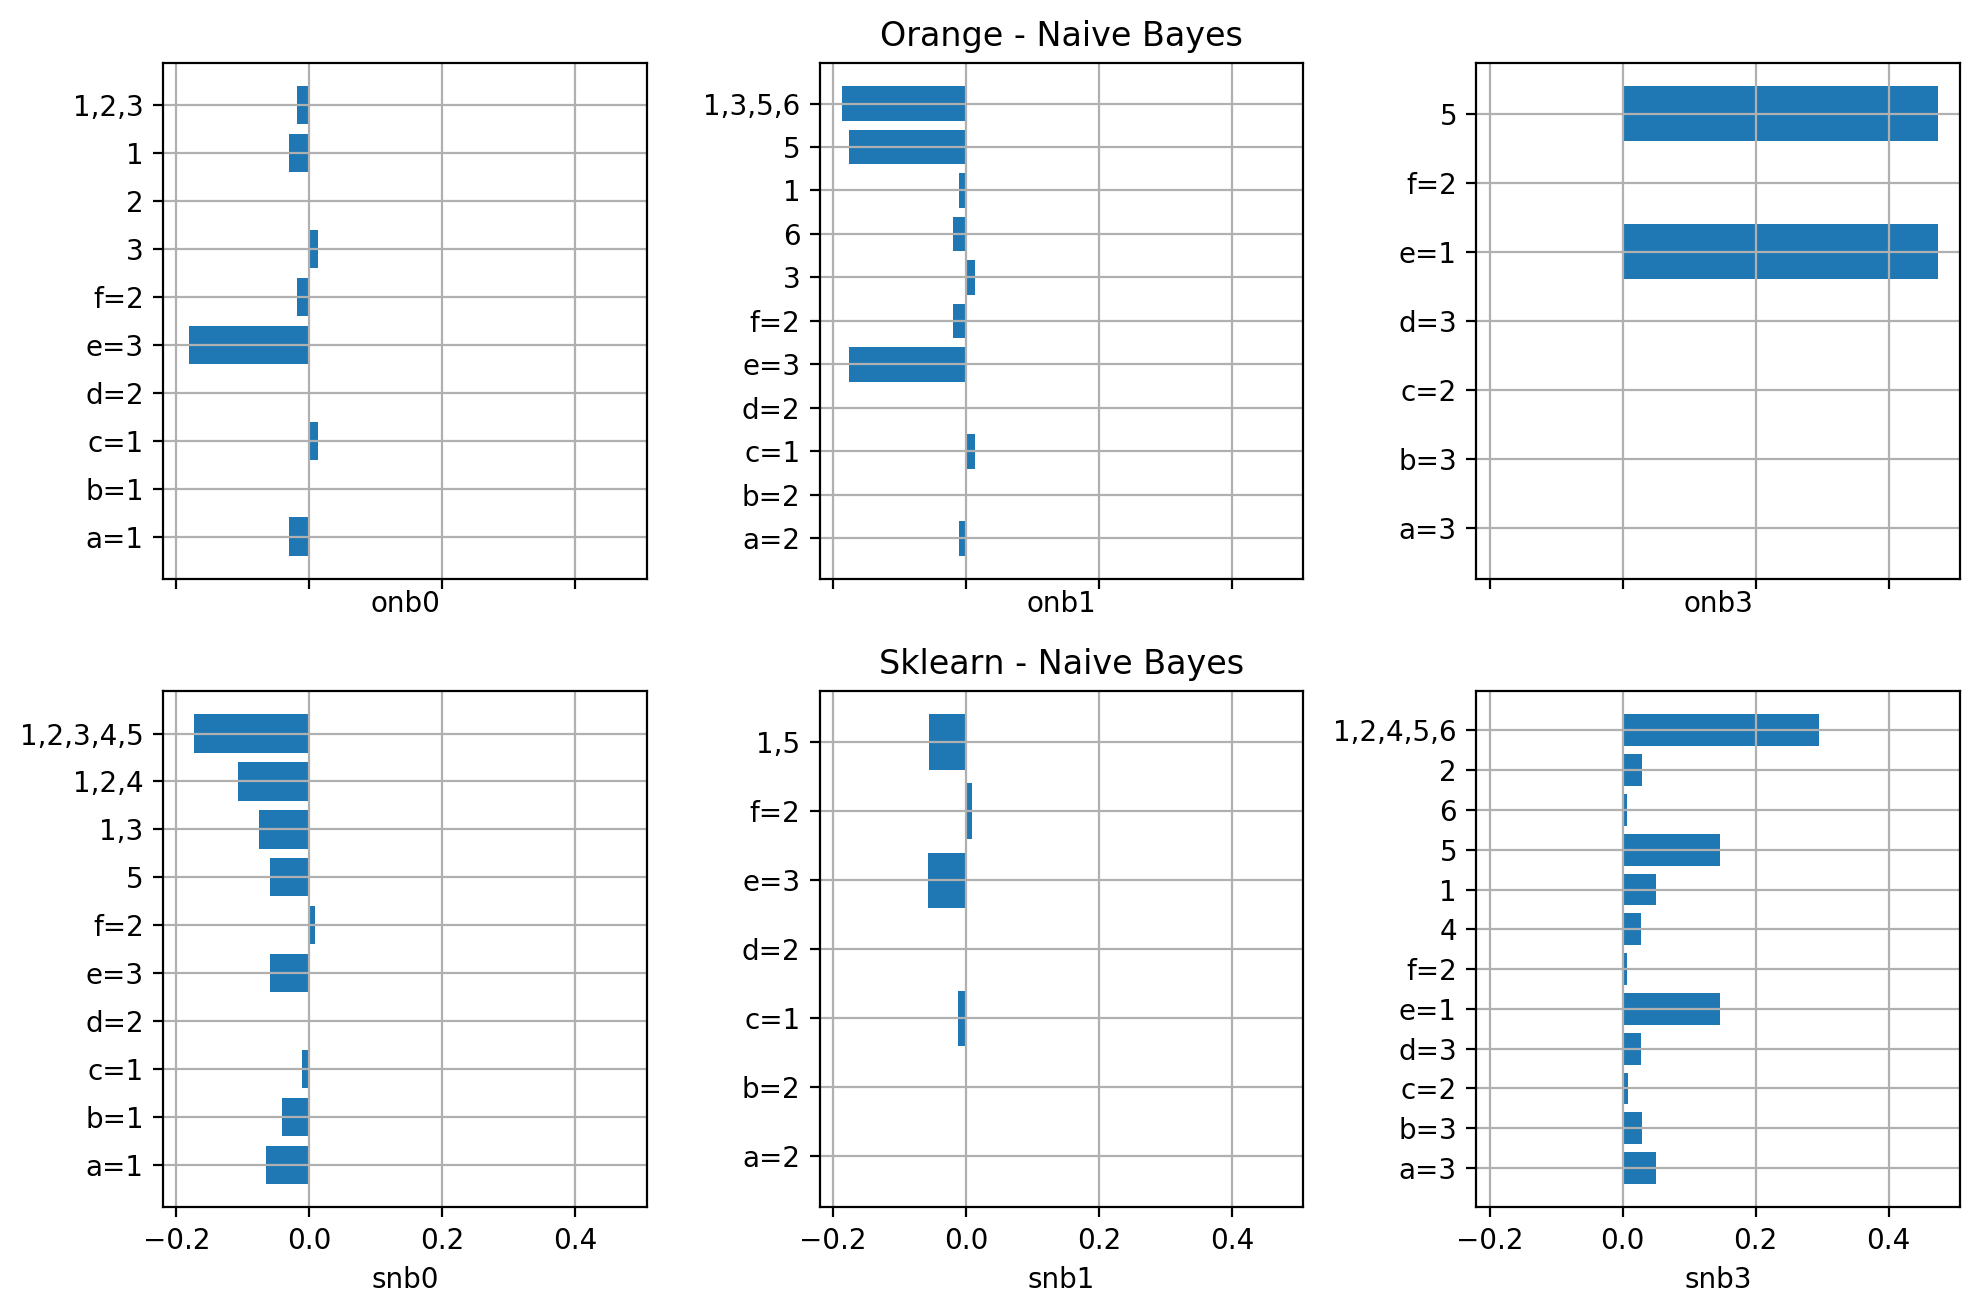

In [7]:
def plot():
    import matplotlib.pyplot as plt
    
    plt.rcParams['figure.figsize'] = [10, 6.67]
    plt.rcParams['figure.dpi'] = 200
    
    fig, axes = plt.subplots(2,3, sharex=True, sharey=False)
    
    for ax,e in zip(list(axes.ravel()), [onb0,onb1,onb3,snb0,snb1,snb3]):
        ax.barh(
            [f"{v.variable.name}={v}" for v in list(e.instance.values())[:-1]] + list(e.map_difference.keys()),
            e.diff_single + list(e.map_difference.values()))
        ax.grid(True)

    for ax,t in zip(
        list(axes.ravel()),
        ['onb0','onb1','onb3','snb0','snb1','snb3']):
        ax.set_xlabel(f"{t}")
    
    axes[0,1].set_title("Orange - Naive Bayes")
    axes[1,1].set_title("Sklearn - Naive Bayes")
    
    fig.tight_layout()
    
plot()

$x^2$

# Random Forest

In [8]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    orf0,orf1,orf3 = get_data("rf")
    srf0,srf1,srf3 = get_data("sklearn_rf")

compute_lace_step k=21
compute_lace_step k=42
compute_lace_step k=63
compute_lace_step k=84
compute_lace_step k=105
compute_lace_step k=126
compute_lace_step k=147
compute_lace_step k=168
compute_lace_step k=189
compute_lace_step k=210
explain_instance errors: [0.18157894736842106, 0.18157894736842106, 0.18157894736842106, 0.18157894736842106, 0.18157894736842106, 0.18157894736842106, 0.18157894736842106, 0.18157894736842106, 0.18157894736842106, 0.18157894736842106]
compute_lace_step k=21
compute_lace_step k=42
compute_lace_step k=63
compute_lace_step k=84
compute_lace_step k=105
compute_lace_step k=126
compute_lace_step k=147
compute_lace_step k=168
compute_lace_step k=189
compute_lace_step k=210
explain_instance errors: [0.18157894736842106, 0.18157894736842106, 0.18157894736842106, 0.18157894736842106, 0.18157894736842106, 0.18157894736842106, 0.18157894736842106, 0.18157894736842106, 0.18157894736842106, 0.18157894736842106]
compute_lace_step k=21
explain_instance errors: [0.00087

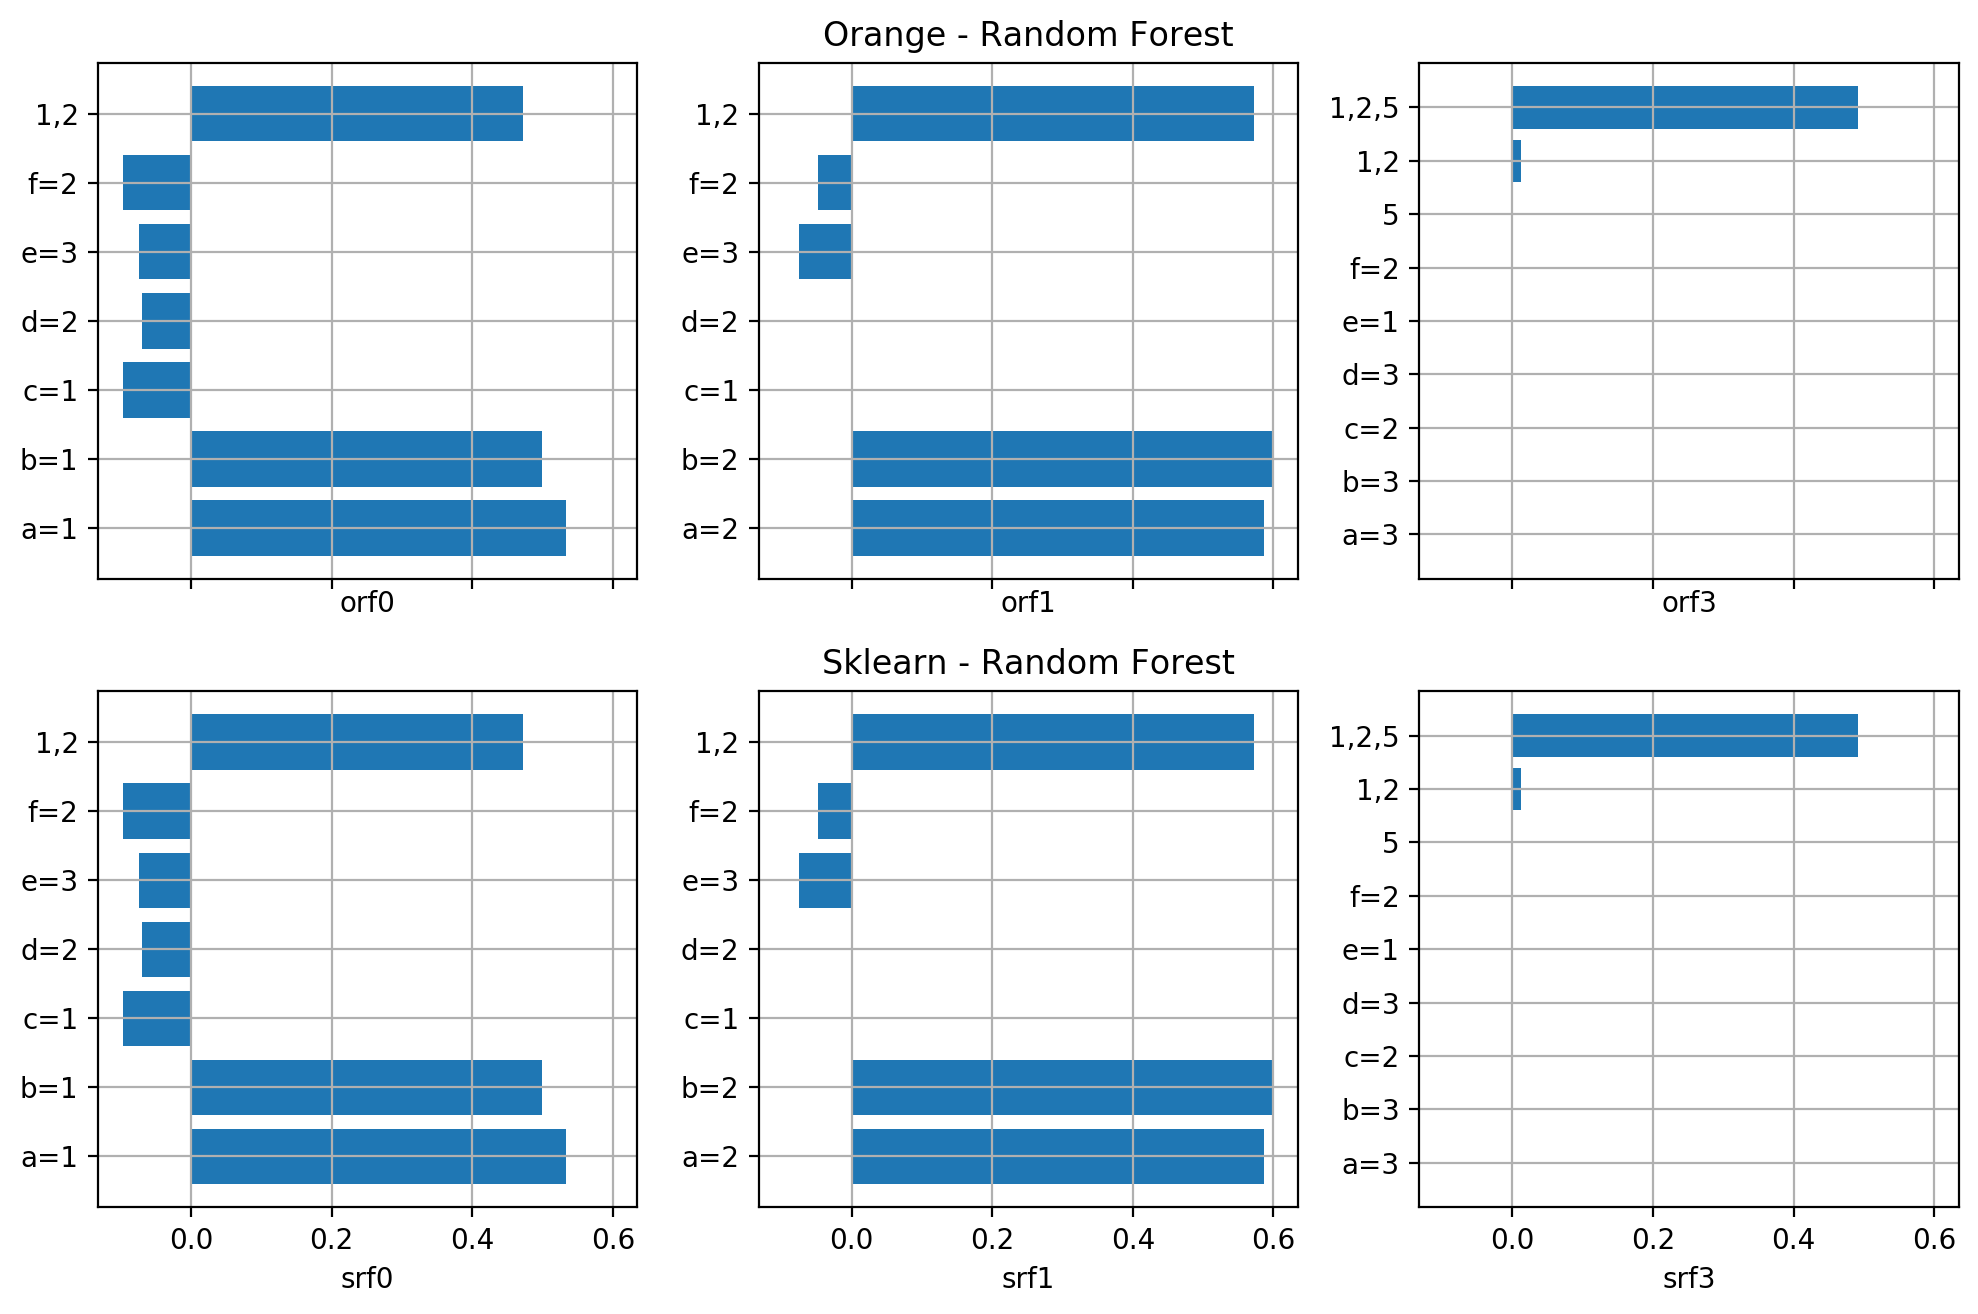

In [9]:
def plot():
    import matplotlib.pyplot as plt
    
    plt.rcParams['figure.figsize'] = [10, 6.67]
    plt.rcParams['figure.dpi'] = 200
    
    fig, axes = plt.subplots(2,3, sharex=True, sharey=False)
    
    for ax,e in zip(list(axes.ravel()), [orf0,orf1,orf3,srf0,srf1,srf3]):
        ax.barh(
            [f"{v.variable.name}={v}" for v in list(e.instance.values())[:-1]] + list(e.map_difference.keys()),
            e.diff_single + list(e.map_difference.values()))
        ax.grid(True)

    for ax,t in zip(
        list(axes.ravel()),
        ['orf0','orf1','orf3','srf0','srf1','srf3']):
        ax.set_xlabel(f"{t}")
    
    axes[0,1].set_title("Orange - Random Forest")
    axes[1,1].set_title("Sklearn - Random Forest")
    
    fig.tight_layout()
    
plot()